**Visual Difference Check**:
Human-visible confirmation of tampered region

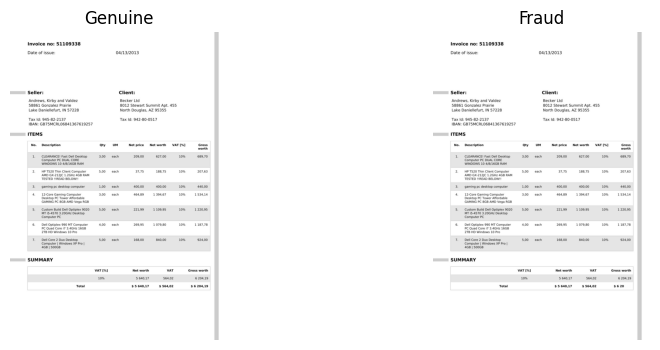

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

genuine_path = r"G:\fraud_document_ai\data\raw\genuine"
fraud_path = r"G:\fraud_document_ai\data\raw\fraud"

genuine_img = cv2.imread(os.path.join(genuine_path, sorted(os.listdir(genuine_path))[0]))
fraud_img = cv2.imread(os.path.join(fraud_path, sorted(os.listdir(fraud_path))[0]))

genuine_img = cv2.cvtColor(genuine_img, cv2.COLOR_BGR2RGB)
fraud_img = cv2.cvtColor(fraud_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Genuine")
plt.imshow(genuine_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Fraud")
plt.imshow(fraud_img)
plt.axis("off")
plt.show()

**Region-Focused Comparison**:Zooming into the summary/total area to localize fraud

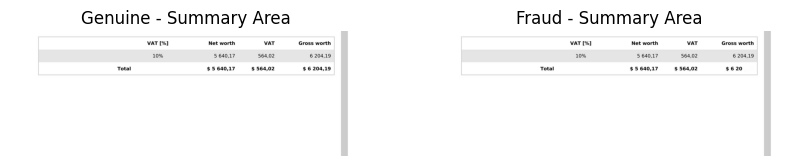

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h, w, _ = genuine_img.shape

# Crop bottom 25% of the image (where total exists)
genuine_crop = genuine_img[int(h*0.75):h, 0:w]
fraud_crop = fraud_img[int(h*0.75):h, 0:w]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Genuine - Summary Area")
plt.imshow(genuine_crop)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Fraud - Summary Area")
plt.imshow(fraud_crop)
plt.axis("off")
plt.show()

**Pixel Difference Check**:Numerical proof that images differ at pixel level (for CNN)

In [4]:
import numpy as np
import cv2

diff = cv2.absdiff(genuine_img, fraud_img)
print("Mean pixel difference:", diff.mean())

Mean pixel difference: 0.21719269095833765


**OCR Output Difference Check**:Text extraction inconsistency caused by tampering

In [8]:
import pytesseract

text_genuine = pytesseract.image_to_string(genuine_img)
text_fraud = pytesseract.image_to_string(fraud_img)

print("---- Genuine OCR (last 300 chars) ----")
print(text_genuine[-300:])

print("\n---- Fraud OCR (last 300 chars) ----")
print(text_fraud[-300:])

---- Genuine OCR (last 300 chars) ----
4,00 each 269,95 1 079,80 10% 1 187,78
PC Quad Core i7 3.4GHz 16GB
2TB HD Windows 10 Pro
Ee Dell Core 2 Duo Desktop 5,00 each 168,00 840,00 10% 924,00
Computer | Windows XP Pro |
AGB | 500GB
SUMMARY
VAT [%] Net worth VAT Gross worth
10% 5 640,17 564,02 6 204,19

Total $ 5 640,17 $ 564,02 $ 6 204,19


---- Fraud OCR (last 300 chars) ----
puter 4,00 each 269,95 1 079,80 10% 1 187,78
PC Quad Core i7 3.4GHz 16GB
2TB HD Windows 10 Pro
ae Dell Core 2 Duo Desktop 5,00 each 168,00 840,00 10% 924,00
Computer | Windows XP Pro |
4GB | 500GB
SUMMARY
VAT [%] Net worth VAT Gross worth
10% 5 640,17 564,02 6 204,19

Total $ 5 640,17 $ 564,02 $620



In [11]:
import pytesseract
import cv2
import os

fraud_path = r"G:\fraud_document_ai\data\raw\fraud"
overwrite_imgs = [f for f in os.listdir(fraud_path) if "overwrite" in f]

img = cv2.imread(os.path.join(fraud_path, overwrite_imgs[0]))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(img)
print(text[-300:])

%]

10%

Total

UM

each

each

03/20/2016

Client:

Dennis, Levy and Bowen
523 Leslie Manors
Lake Colleenville, CT 12053

Tax Id: 904-82-9186

Net price Net worth VAT [%]
10,99 32,97 10%
50,00 50,00 10%

Net worth VAT
82,97 8,30
$ 82,97 $ 8,30

Gross
worth

36,27

55,00

Gross worth
91,27

$ 81,27



In [12]:
import pytesseract
import cv2
import os

# Load one genuine and one overwrite-fraud image
genuine_path = r"G:\fraud_document_ai\data\raw\genuine"
fraud_path = r"G:\fraud_document_ai\data\raw\fraud"

genuine_file = sorted(os.listdir(genuine_path))[0]
fraud_file = [f for f in os.listdir(fraud_path) if "overwrite" in f][0]

genuine_img = cv2.imread(os.path.join(genuine_path, genuine_file))
fraud_img = cv2.imread(os.path.join(fraud_path, fraud_file))

genuine_img = cv2.cvtColor(genuine_img, cv2.COLOR_BGR2RGB)
fraud_img = cv2.cvtColor(fraud_img, cv2.COLOR_BGR2RGB)

# Crop bottom 25% (summary area)
h, w, _ = genuine_img.shape
genuine_roi = genuine_img[int(h*0.75):h, 0:w]
fraud_roi = fraud_img[int(h*0.75):h, 0:w]

# OCR only on ROI
text_genuine = pytesseract.image_to_string(genuine_roi)
text_fraud = pytesseract.image_to_string(fraud_roi)

print("---- Genuine Summary OCR ----")
print(text_genuine)

print("\n---- Fraud Summary OCR ----")
print(text_fraud)

---- Genuine Summary OCR ----
VAT [%] Net worth VAT Gross worth
10% 5 640,17 564,02 6 204,19

Total $ 5 640,17 $ 564,02 $ 6 204,19


---- Fraud Summary OCR ----
2. Jordan Nike Kid Air 1 Retro High 1,00 each
Black Gray Elephant Size 7Y
838850-013

SUMMARY

VAT [%]
10%

Total

50,00

Net worth

82,97

$ 82,97

50,00

VAT

8,30

$ 8,30

10%

55,00

Gross worth
91,27

$ 81,27

